# Rozdział 10. Macierze rzadkie i grafy

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import scipy.sparse as sp
# import scipy.sparse.linalg
import scipy.linalg as la

import networkx as nx

## Format listy współrzędnych

In [5]:
values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]

A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [6]:
A

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in COOrdinate format>

In [7]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int32'), 2)

In [8]:
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [9]:
A.row

array([0, 1, 2, 3])

In [10]:
A.col

array([1, 3, 2, 0])

In [18]:
A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [19]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [20]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

Nie wszystkie formaty macierzy rzadkich wspierają indeksowanie:

In [21]:
A[1, 2]

TypeError: 'coo_matrix' object is not subscriptable

In [22]:
A.tobsr()[1, 2]

NotImplementedError: 

Niektóre tak:

In [23]:
A.tocsr()[1, 2]

0

In [24]:
A.tolil()[1:3, 3]

<2x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in List of Lists format>

## CSR

In [25]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]]); A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [26]:
A = sp.csr_matrix(A)

In [27]:
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32)

In [29]:
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [30]:
i = 2

In [31]:
A.indptr[i], A.indptr[i+1]-1

(4, 5)

In [32]:
A.indices[A.indptr[i]:A.indptr[i+1]]

array([2, 3], dtype=int32)

In [33]:
A.data[A.indptr[i]:A.indptr[i+1]]

array([5, 6])

In [34]:
A[2, 2], A[2,3] # Sprawdzenie

(5, 6)

## Funkcje do tworzenia macierzy rzadkich

In [35]:
N = 10

In [36]:
A = -2 * sp.eye(N) + sp.eye(N, k=1) + sp.eye(N, k=-1)

In [37]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [38]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

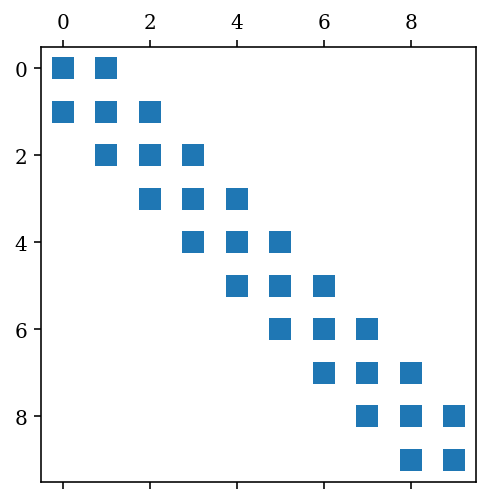

In [39]:
fig, ax = plt.subplots()
ax.spy(A)
fig.savefig("ch10-sparse-matrix-1.pdf");

In [40]:
A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csc')

In [41]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

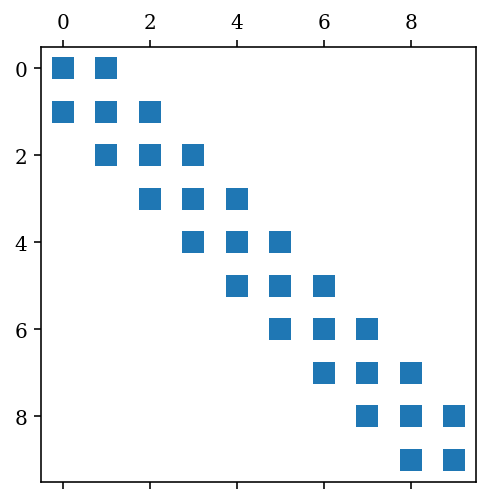

In [42]:
fig, ax = plt.subplots()
ax.spy(A);

In [43]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])

In [44]:
B

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements (2 diagonals) in DIAgonal format>

In [45]:
C = sp.kron(A, B, format='csr')
C

<30x30 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

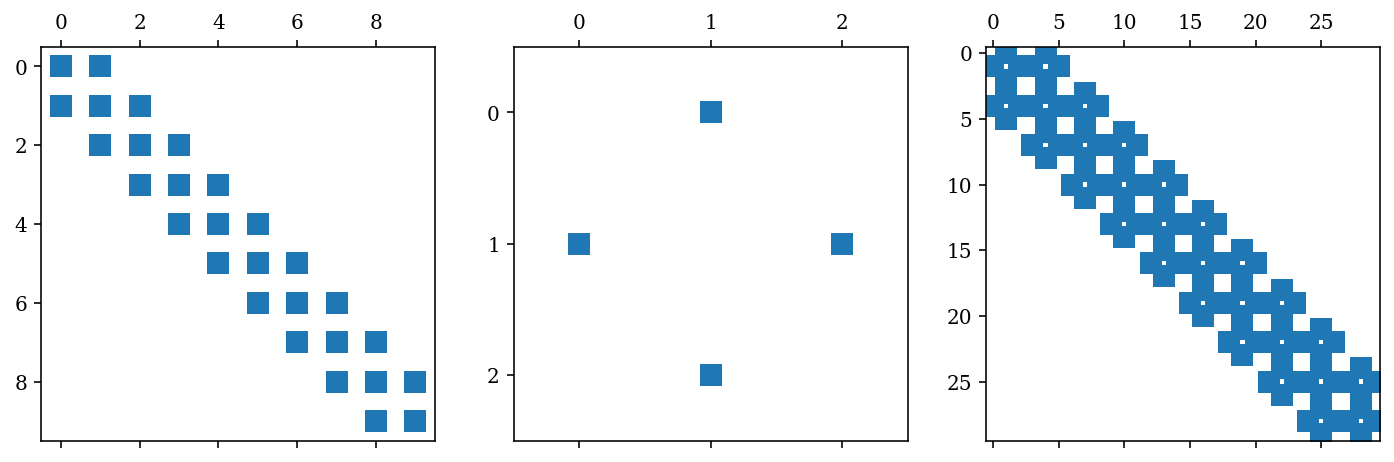

In [46]:
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)
fig.savefig("ch10-sparse-matrix-2.pdf");

## Alebra liniowa macierzy rzadkich

In [47]:
N = 10

In [48]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

In [49]:
b = -np.ones(N)

In [50]:
x = sp.linalg.spsolve(A, b)

In [51]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [52]:
np.linalg.solve(A.todense(), b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [53]:
lu = sp.linalg.splu(A)

In [54]:
lu.L

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [55]:
lu.perm_r

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32)

In [56]:
lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [57]:
def sp_permute(A, perm_r, perm_c):
    """ Permutacja wierszy i kolumn macierzy A """
    M, N = A.shape
    # Macierz permutacji wierszy
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    # Macierz permutacji kolumn
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()
    return Pr.T * A * Pc.T

In [58]:
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

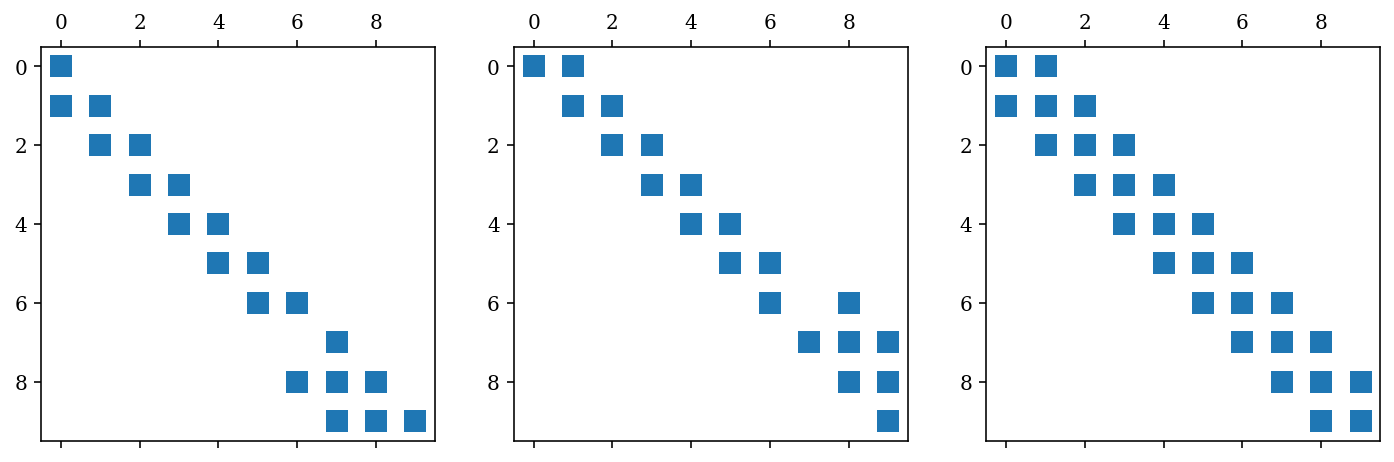

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.spy(lu.L)
ax2.spy(lu.U)
ax3.spy(A)

In [60]:
x = lu.solve(b)

In [61]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [62]:
# use_umfpack=True działa tylko gdy zainstalowany jest scikit-umfpack

x = sp.linalg.spsolve(A, b, use_umfpack=True)

In [63]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [64]:
x, info = sp.linalg.cg(A, b)

In [65]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [66]:
x, info = sp.linalg.bicgstab(A, b)

In [67]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [68]:
# Argument atol to nowy dodatek do tego wywołania
x, info = sp.linalg.lgmres(A, b, atol=1e-5)

In [69]:
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [70]:
N = 25

### Przykład permutacji macierzy odwrotnym algorytmem Cuthilla-McKee'a

In [71]:
A = sp.diags([1, -2, 1], [8, 0, -8], shape=[N, N], format='csc')

In [72]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
perm

array([ 7, 15, 23,  1,  9, 17,  2, 10, 18,  3, 11, 19,  4, 12, 20,  5, 13,
       21,  6, 14, 22, 24, 16,  8,  0], dtype=int32)

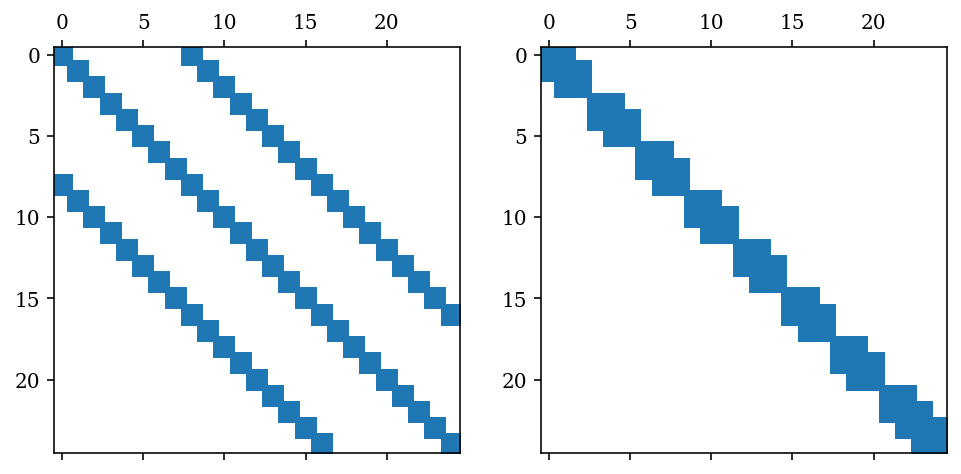

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A)
ax2.spy(sp_permute(A, perm, perm))

### Porównanie wydajności reprezentacji rzadkich i gęstych (rysunek 10.3)

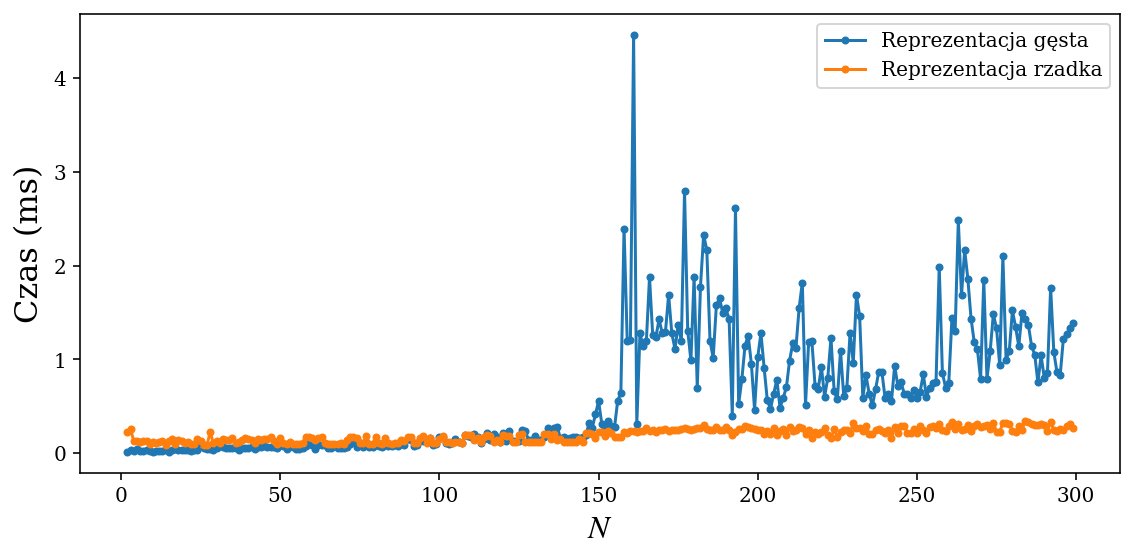

In [74]:
# Porównanie szybkości rozwiazywania układu równań Ax = b, z macierzą A o wymiarach N x N
# Macierz A jest rzadką macierzą opisującą jednowymiarowy problem Poissona
import time

def setup(N):
    A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csr')
    b = -np.ones(N)
    return A, A.todense(), b

reps = 10
N_vec = np.arange(2, 300, 1)
t_sparse = np.empty(len(N_vec))
t_dense = np.empty(len(N_vec))
for idx, N in enumerate(N_vec):
    A, A_dense, b = setup(N)
    t = time.time()
    for r in range(reps):
        x = np.linalg.solve(A_dense, b)
    t_dense[idx] = (time.time() - t)/reps
    t = time.time()
    for r in range(reps):
        x = sp.linalg.spsolve(A, b, use_umfpack=True)
    t_sparse[idx] = (time.time() - t)/reps
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(N_vec, t_dense * 1e3, '.-', label="Reprezentacja gęsta")
ax.plot(N_vec, t_sparse * 1e3, '.-', label="Reprezentacja rzadka")
ax.set_xlabel(r"$N$", fontsize=16)
ax.set_ylabel("Czas (ms)", fontsize=16)
ax.legend(loc=0)
fig.tight_layout()
fig.savefig("ch10-sparse-vs-dense.pdf")

### Problem wartości własnych

In [75]:
N = 10

In [76]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

In [77]:
evals, evecs = sp.linalg.eigs(A, k=4, which='LM')

In [78]:
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [79]:
np.allclose(A.dot(evecs[:,0]), evals[0] * evecs[:,0])

True

In [80]:
evals, evecs = sp.linalg.eigsh(A, k=4, which='LM')

In [81]:
evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [82]:
evals, evecs = sp.linalg.eigs(A, k=4, which='SR')

In [83]:
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [84]:
np.real(evals).argsort()

array([0, 1, 2, 3])

In [85]:
def sp_eigs_sorted(A, k=6, which='SR'):
    """ Oblicza i zwraca wartości własne posortowane rosnąco względem części rzeczywistych """
    evals, evecs = sp.linalg.eigs(A, k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]

In [86]:
evals, evecs = sp_eigs_sorted(A, k=4, which='SM')

In [87]:
evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

#### Przykład z macierzami losowymi

In [88]:
N = 100

In [89]:
x_vec = np.linspace(0, 1, 50)

In [90]:
# Stałe ziarno w funkcji sp.rand pozwala na otrzymanie powtarzalnych wyników
M1 = sp.rand(N, N, density=0.2, random_state=112312321)
# M1 = M1 + M1.conj().T
M2 = sp.rand(N, N, density=0.2, random_state=984592134)
# M2 = M2 + M2.conj().T

In [91]:
evals = np.array([sp_eigs_sorted((1-x)*M1 + x*M2, k=25)[0] for x in x_vec])

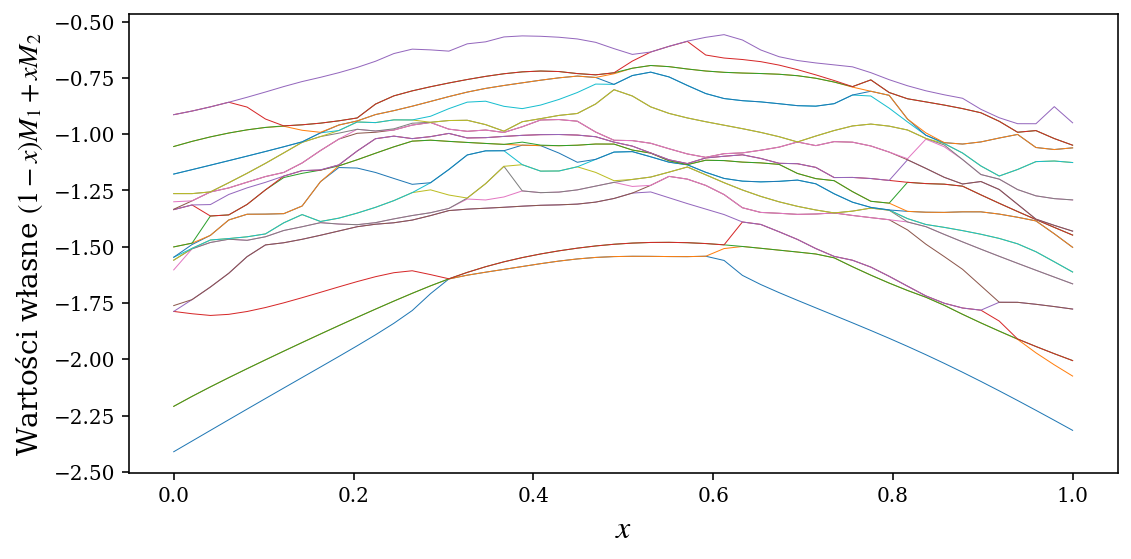

In [92]:
fig, ax = plt.subplots(figsize=(8, 4))

for idx in range(evals.shape[1]):
    ax.plot(x_vec, np.real(evals[:,idx]), lw=0.5)

ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"Wartości własne $(1-x)M_1+xM_2$", fontsize=14)

fig.tight_layout()
fig.savefig("ch10-sparse-eigs.pdf")

## Grafy

In [93]:
g = nx.MultiGraph()

In [94]:
g.add_node(1)

In [95]:
g.nodes()

NodeView((1,))

In [96]:
g.add_nodes_from([3, 4, 5])

In [97]:
g.nodes()

NodeView((1, 3, 4, 5))

In [98]:
g.add_edge(1, 2)

0

In [99]:
g.edges()

MultiEdgeDataView([(1, 2)])

In [100]:
g.add_edges_from([(3, 4), (5, 6)])

[0, 0]

In [101]:
g.edges()

MultiEdgeDataView([(1, 2), (3, 4), (5, 6)])

In [102]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])

In [103]:
g.edges()

MultiEdgeDataView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6)])

In [104]:
g.edges(data=True)

MultiEdgeDataView([(1, 2, {}), (1, 3, {'weight': 1.5}), (3, 4, {}), (3, 5, {'weight': 2.5}), (5, 6, {})])

In [105]:
g.add_weighted_edges_from([(6, 7, 1.5)])

In [106]:
g.nodes()

NodeView((1, 3, 4, 5, 2, 6, 7))

In [107]:
g.edges()

MultiEdgeDataView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)])

In [108]:
import numpy as np

In [109]:
import json

In [110]:
with open("tokyo-metro.json") as f:
    data = json.load(f)

In [111]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [112]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [113]:
# data

In [114]:
g = nx.Graph()

for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [115]:
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [116]:
g.number_of_nodes()

184

In [117]:
list(g.nodes())[:5]

['C1', 'C2', 'C3', 'C4', 'C5']

In [118]:
g.number_of_edges()

243

In [119]:
list(g.edges())[:5]

[('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C3', 'F15'), ('C4', 'C5')]

In [120]:
on_foot = [edge for edge in g.edges() if g.get_edge_data(*edge)["transfer"]]

In [121]:
on_train = [edge for edge in g.edges() if not g.get_edge_data(*edge)["transfer"]]

In [122]:
colors = [data[n[0].upper()]["color"] for n in g.nodes()]

In [123]:
from networkx.drawing.nx_agraph import graphviz_layout

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


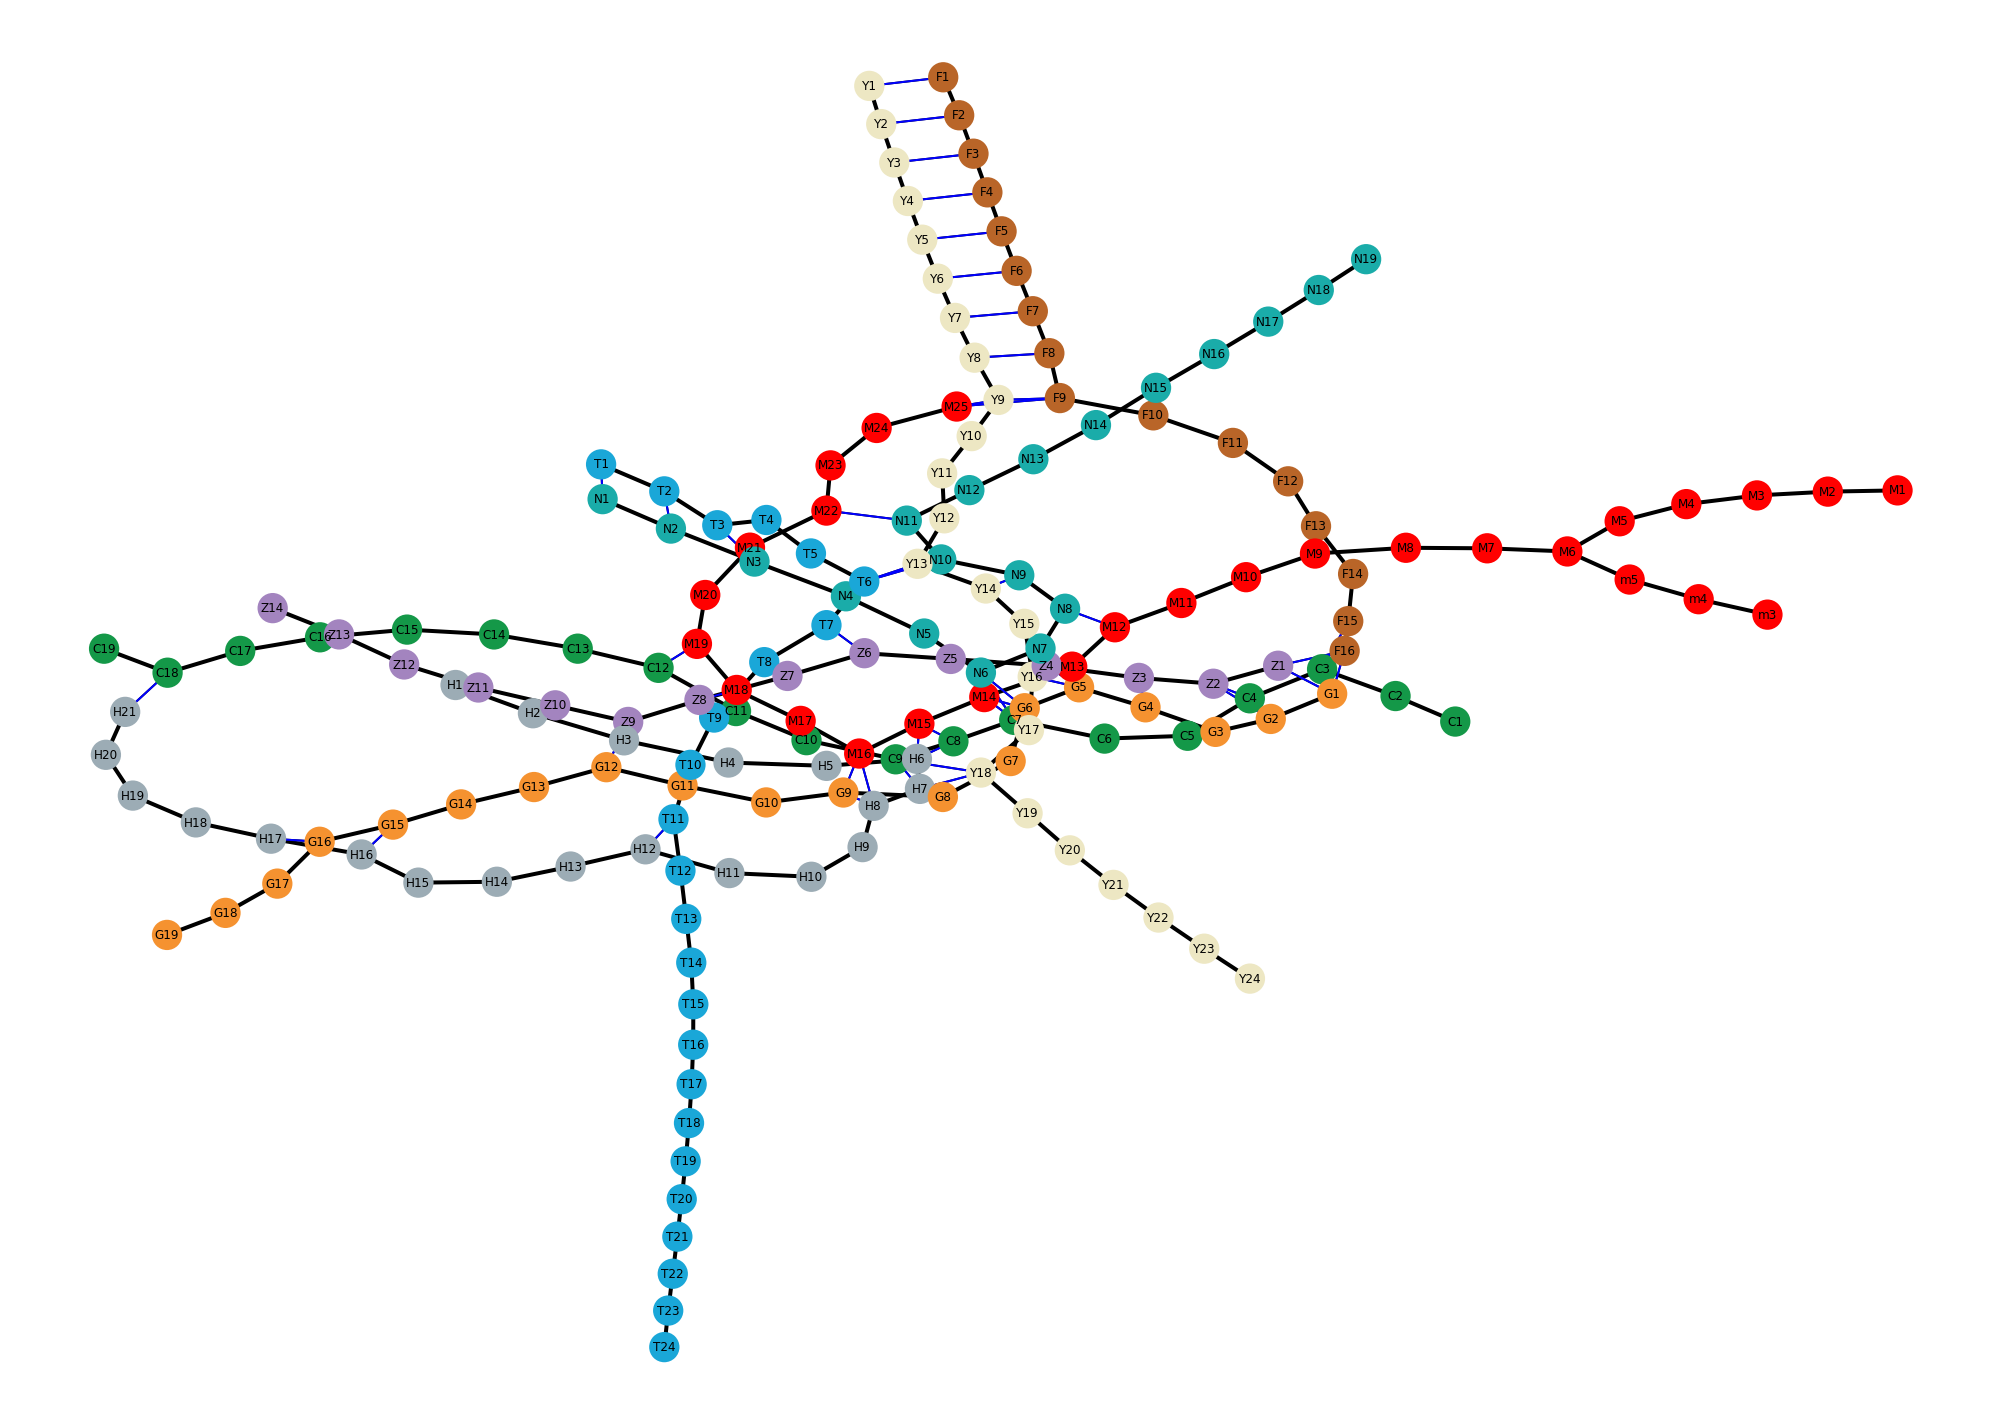

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="blue")

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

fig.savefig("ch10-metro-graph.pdf")
fig.savefig("ch10-metro-graph.png")
fig.tight_layout()

In [125]:
g.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

In [126]:
d_max = max(d for (n, d) in g.degree())

In [127]:
[(n, d) for (n, d) in g.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

In [128]:
p = nx.shortest_path(g, "Y24", "C19")

In [129]:
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [130]:
np.sum([g[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in g[p[n]][p[n+1]]])

35

In [131]:
h = g.copy()

In [132]:
for n1, n2 in h.edges():
    if h[n1][n2]["transfer"]:
        h[n1][n2]["weight"] = 5


In [133]:
p = nx.shortest_path(h, "Y24", "C19")

In [134]:
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [135]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

40

In [136]:
p = nx.shortest_path(h, "Z1", "H16")

In [137]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

32

In [138]:
A = nx.to_scipy_sparse_matrix(g)

In [139]:
A

<184x184 sparse matrix of type '<class 'numpy.int64'>'
	with 486 stored elements in Compressed Sparse Row format>

In [140]:
perm = sp.csgraph.reverse_cuthill_mckee(A)

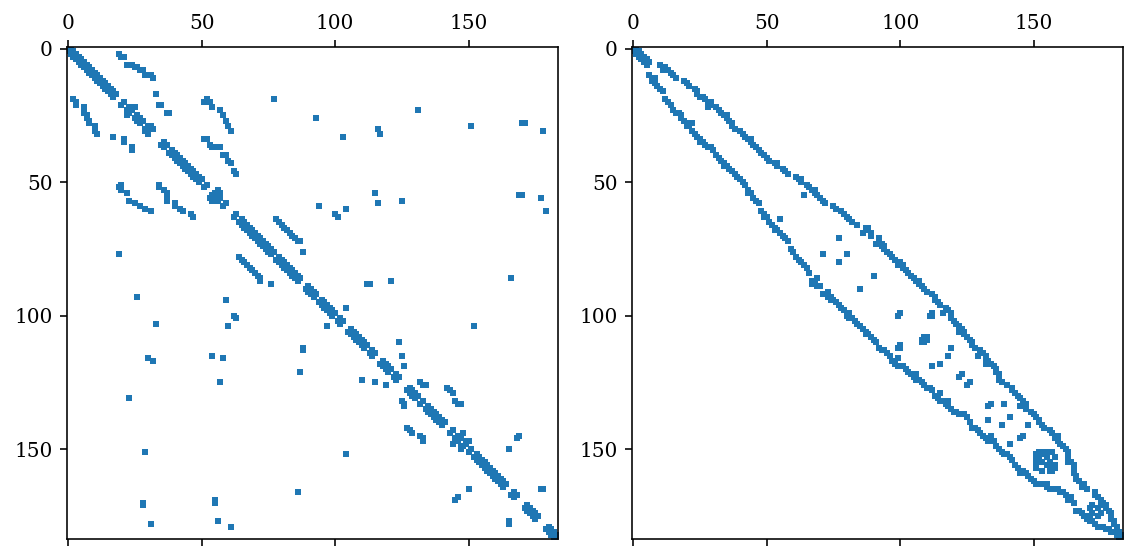

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)
fig.tight_layout()
fig.savefig("ch12-rcm-graph.pdf")